The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


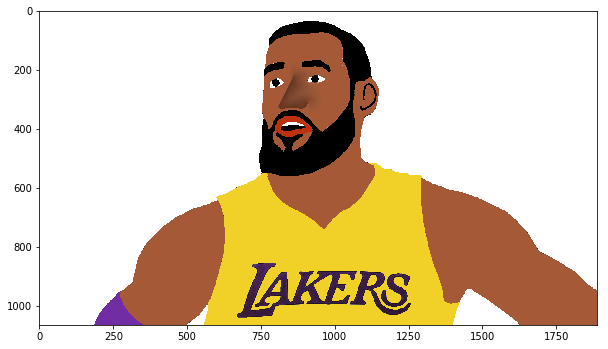

time: 678 ms


In [11]:
%matplotlib inline
%load_ext autotime
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import os
import imutils
from connect_image import *

img = cv2.imread('images/lebron2.png', 1)

# img = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rgb)

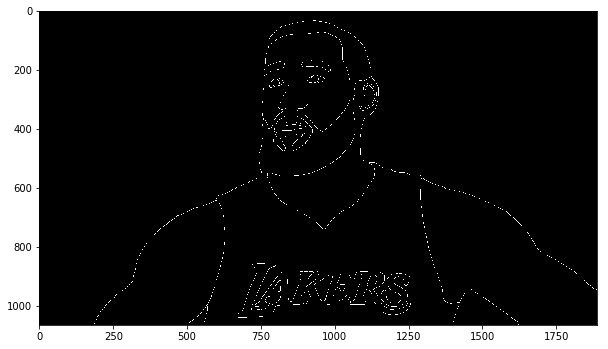

time: 588 ms


In [20]:
edges = extract_edges(img, blur=5, thresh1=100, thresh2=200)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edges, cmap='gray')  

22
19


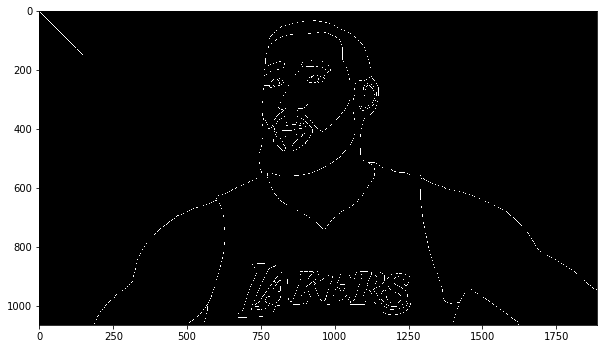

time: 38.1 s


In [21]:
connected_edges = np.copy(edges)
components = find_components(connected_edges)
filtered_components = []
min_component_size = 15
for component in components:
    if len(component) >= min_component_size:
        filtered_components.append(component)
    else:
        x = np.array(list(component))
        connected_edges[x[:,0],x[:,1]] = False
print len(components)
components = filtered_components
print len(components)
# A = connect2(connected_edges, components)
# A = np.array(A)
# approx_img = np.zeros_like(connected_edges).astype('uint8')
# A = np.array(list(components[16]))
# approx_img[A[:,0],A[:,1]] = True
connected_edges[0,0] = True
components = [set([(0,0)])] + components
connect(connected_edges, components)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(connected_edges, cmap='gray')  

In [ ]:
connected_edges


In [7]:
# 28,227
x, y  = local_search(connected_edges, [(28, 227)], set([(28, 227)]), set(), 30)
print len(x), len(y)

1 0
time: 33.8 ms


In [75]:
y

set()

time: 7.34 ms


Reduced points from 22042 to 887


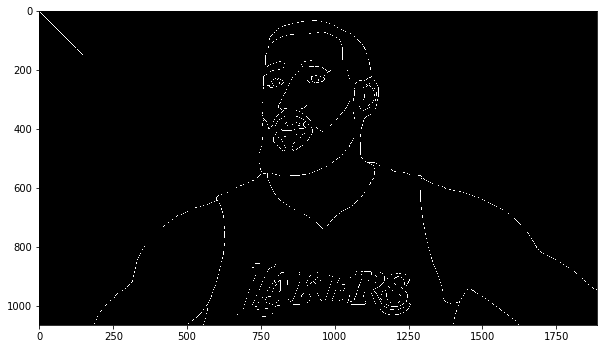

time: 4.63 s


In [22]:
(i, j) = np.argwhere(connected_edges)[0]

path, costs, paths = nn_tsp(connected_edges, (i, j))
path = np.array(path)
# path = np.fliplr(path)
# B, vid2 = improve_path(connected_edges, approx, path, graph, vid)
# approx = graph2path(graph, [(k, l) for (k, l) in path[:2]], vid)

# path = graph2path(connected_edges, graph, tuple(path[0]), vid, paths)
# path = np.array(path)
# approx = np.squeeze(cv2.approxPolyDP(path, 0.9, False))
# approx_img = np.zeros_like(connected_edges).astype('uint8')

# approx2 = improve_path2(connected_edges, path, costs, paths)
approx1 = simplify_path(path, 1.8)
approx1 = np.fliplr(approx1)
approx_img = np.zeros_like(connected_edges).astype('uint8')
cv2.drawContours(approx_img, [approx1], -1, 255, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(approx_img, cmap='gray') 
print 'Reduced points from %s to %s' % (path.shape[0], approx1.shape[0])


In [77]:
path.tolist().index([28, 27])



ValueError: [28, 27] is not in list

time: 27.9 ms


In [79]:
improve_path(connected_edges, graph, vid, paths)
# path = graph2path(connected_edges, graph, tuple(path[0]), vid, paths)
# path = np.array(path)

# approx_img = np.zeros_like(connected_edges).astype('uint8')
# cv2.drawContours(approx_img, [path], -1, 255, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(approx_img, cmap='gray') 
print 'Reduced points to %s' % (path.shape[0])

NameError: name 'improve_path' is not defined

time: 66.8 ms


In [ ]:
approx[354], approx[355]

In [23]:
import pickle
m, n = connected_edges.shape
with open('lebron2.pts', 'w') as f:
    pickle.dump((approx1, m, n), f)

time: 28 ms


In [81]:
approx1[870:]


array([], shape=(0, 2), dtype=int32)

time: 10.1 ms


In [ ]:
c = 0
for i in range(413):
    for j in range(413):
        c += 1

In [ ]:
approx

In [ ]:
len(costs)

In [ ]:
path[:28]

In [ ]:
costs

In [ ]:
approx[:30]

In [ ]:
new_costs

In [ ]:
approx.shape

In [ ]:
approx2.shape

In [ ]:
approx1.shape


In [ ]:
approx2.shape

In [ ]:
np.version.version


In [ ]:
costs[4450:-3]
